# Project 2 - Predicting Energy Output of London Homes. 

### Part 2 - Data Cleaning
1. Import/Clean the Scraped Weather Data
1. Import/Clean the Kaggle Energy Use Data
1. Build the necessary features from the Household Info dataset
1. Merge and pickle all data 


In [1]:
from bs4 import BeautifulSoup as BS
import requests
import pandas as pd
import time
from functools import reduce
import formulas

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
sns.set()


In [2]:
%matplotlib inline

# Load and Clean the Weather Dataset

In [5]:
df_2012 = pd.read_pickle('Data/Weather_2012.pkl')
df_2013 = pd.read_pickle('Data/Weather_2013.pkl')

In [4]:
weather_scrape = pd.concat([df_2012, df_2013], ignore_index=True)

In [5]:
def clean_scrape_weather(scrape_df):
    """DOCSTRING
    Objective: 
    1. Remove rows with non-numeric values
    2. Convert date column to date-type

    Output: Cleaned DataFrame
    """
    
    columns = scrape_df.columns
    for i in columns[:-1]:
        scrape_df = scrape_df[(scrape_df[i] != 'Max')]
        scrape_df = scrape_df[(scrape_df[i] != 'Total')]
        try: 
            scrape_df[i] = pd.to_numeric(scrape_df[i])
        except:
            pass
    scrape_df['Date']  = pd.to_datetime(scrape_df['Date']).dt.date
    return scrape_df


In [6]:
weather_scrape = clean_scrape_weather(weather_scrape)
weather_scrape

,Temp_Avg,Dewpoint_avg,Humidity,Wind_Speed,Pressure,Rain,Date
0,52.8,48.8,87.1,10.2,29.6,0.0,2012-01-01
1,44.4,36.7,75.0,12.7,29.8,0.0,2012-01-02
2,48.7,40.1,76.5,20.8,29.6,0.0,2012-01-03
3,45.6,29.2,72.9,19.7,29.9,0.0,2012-01-04
4,49.1,39.4,68.8,22.7,29.6,0.0,2012-01-05
5,45.2,38.1,76.3,10.6,30.2,0.0,2012-01-06
6,49.3,39.6,69.8,14.0,30.1,0.0,2012-01-07
7,48.5,39.4,70.8,10.1,30.3,0.0,2012-01-08
8,51.3,45.1,79.5,10.2,30.4,0.0,2012-01-09
9,50.7,45.5,82.8,10.0,30.5,0.0,2012-01-10


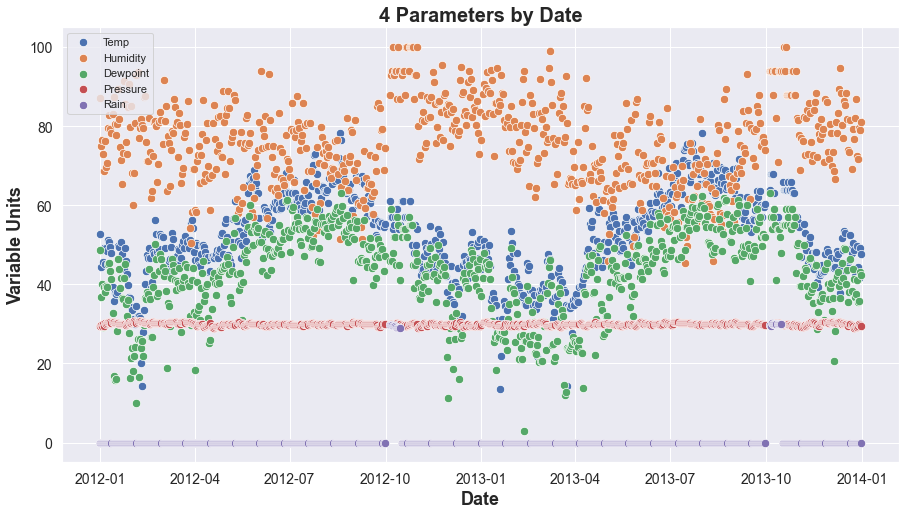

In [98]:
#Visualize the Data to ensure it looks similar to an expected output
plt.figure(figsize=(15,8)) 
sns.scatterplot(x='Date', y='Temp_Avg', data=weather_scrape, label='Temp', s=70)
sns.scatterplot(x='Date', y='Humidity', data=weather_scrape, label = 'Humidity', s=70)
sns.scatterplot(x='Date', y='Dewpoint_avg', data=weather_scrape, label = 'Dewpoint', s=70)
sns.scatterplot(x='Date', y='Pressure', data=weather_scrape, label = 'Pressure', s=70)
sns.scatterplot(x='Date', y='Rain', data=weather_scrape, label = 'Rain', s=70)
plt.title('4 Parameters by Date', size=20, fontweight='bold')
plt.ylabel('Variable Units', fontweight='bold', size=18)
plt.xlabel('Date', fontweight='bold', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.axes_style("darkgrid");


### Observations
Most parameters look normal except for Rain.  There is no recorded rainfall at all (which was verified on the actual website), so will delete that column as this data is unreliable. 


# Pull the Weather Data From Kaggle to Extract the Length of Daylight Hours

In [6]:
weather_kaggle = pd.read_csv('Data/London_SmartMeter-Data/weather_daily_darksky.csv')

In [11]:
def clean_weather_kaggle(weather_df_kaggle):
    """ DOCSTRING:
    Objective: 
    1. Keep only dates from Jan-2012 to Dec-2013
    2. Drop all columns except date, sunriseTime, and sunsetTime.
    Add an additional column for the Daylight Hours. 
    3. Convert Time columns to proper format
    4. Create Calculated Column for the Daylight in Minutes for each day
    
    Output: Cleaned DataFrame
    """
    weather_df_kaggle = weather_df_kaggle[(weather_df_kaggle['time']>= '2012-01-01 00:00:00') & 
                                (weather_df_kaggle['time']<= '2013-12-31 00:00:01')]
    weather_df_kaggle = weather_df_kaggle.sort_values(by='time').reset_index()
    weather_df_kaggle = weather_df_kaggle.drop(['index', 'temperatureMax', 'temperatureMaxTime',
       'windBearing', 'icon', 'dewPoint', 'temperatureMinTime', 'cloudCover',
       'windSpeed', 'pressure', 'apparentTemperatureMinTime',
       'apparentTemperatureHigh', 'precipType', 'visibility', 'humidity',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureMax', 'uvIndex', 
       'temperatureLow', 'temperatureMin', 'temperatureHigh', 
       'temperatureHighTime', 'uvIndexTime', 'summary', 'temperatureLowTime',
       'apparentTemperatureMin', 'apparentTemperatureMaxTime',
       'apparentTemperatureLowTime', 'moonPhase'], axis=1)
    weather_df_kaggle['time'] = pd.to_datetime(weather_df_kaggle['time']).dt.date
    weather_df_kaggle['sunsetTime'] = pd.to_datetime(weather_df_kaggle['sunsetTime'],format='%Y/%m/%d %H:%M:%S')
    weather_df_kaggle['sunriseTime'] = pd.to_datetime(weather_df_kaggle['sunriseTime'],format='%Y/%m/%d %H:%M:%S')
    weather_df_kaggle['Daylight(Min)'] = (weather_df_kaggle['sunsetTime'] - 
                                             weather_df_kaggle['sunriseTime']).astype('timedelta64[m]')
    return weather_df_kaggle

def merge_weather_dfs(weather_df_scrape, weather_df_kaggle):
    """ DOCSTRING
    Objective: 
    1. Merge the Webscraped Data with the Weather Data from Kaggle
    
    Output: Merged Dataframe of all necessary Weather components
    """
    weather_final = weather_df_scrape.merge(weather_df_kaggle, left_on ='Date', right_on='time', how='left')
    return weather_final

In [12]:
weather_kaggle_clean = clean_weather_kaggle(weather_kaggle)

In [13]:
weather_complete = merge_weather_dfs(weather_scrape, weather_kaggle_clean)

In [49]:
weather_complete.head(3)

,Temp_Avg,Dewpoint_avg,Humidity,Wind_Speed,Pressure,Rain,Date,time,sunsetTime,sunriseTime,Daylight(Min)
0,52.8,48.8,87.1,10.2,29.6,0.0,2012-01-01,2012-01-01,2012-01-01 16:02:20,2012-01-01 08:07:25,474.0
1,44.4,36.7,75.0,12.7,29.8,0.0,2012-01-02,2012-01-02,2012-01-02 16:03:21,2012-01-02 08:07:19,476.0
2,48.7,40.1,76.5,20.8,29.6,0.0,2012-01-03,2012-01-03,2012-01-03 16:04:26,2012-01-03 08:07:09,477.0


# Pull All the Energy Usage Data from Kaggle

In [7]:
#Contains energy use for every house 
energy_all = pd.read_csv('Data/London_SmartMeter-Data/daily_dataset.csv/daily_dataset.csv')
#Contains information about the homes
household_info = pd.read_csv('Data/London_SmartMeter-Data/informations_households.csv')
#Acorn Information which gives info about the house type in each group
acorn = pd.read_csv('Data/London_SmartMeter-Data/acorn_details.csv',encoding='latin1')
#Holiday Calendar
holidays = pd.read_csv('Data/London_SmartMeter-Data/uk_bank_holidays.csv')

In [16]:
energy_all['LCLid'].nunique() #There were over 5500 households in the study

5566

In [17]:
type(energy_all['day'][0])

str

# Clean the Energy Usage dataframe

Since my weather data collection starts on 2012-01-01, and not all energy usage data begins then, I decided to use that data as a cutoff for which homes I decide to include on my analysis. 

In [18]:
#Merge the 2 datasets
def merge_energy_house(en_df, ho_df):
    """DOCSTRING
    Objective: 
    1. Convert Date column to datetype
    2. Keep dates from 01-2012 to 12-2013
    3. Merge the energy usage data with the Household Info sheet
    """
    en_df = en_df[(en_df['day']>='2012-01-01') & 
                             (en_df['day']<='2013-31-01')]
    en_df['day'] = pd.to_datetime(en_df['day']).dt.date

    return en_df.merge(ho_df, on='LCLid', how='left').sort_values(by=['day', 'LCLid'])

energy_house = merge_energy_house(energy_all, household_info)

<ipython-input-18-b1f9b9f2d1b1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['day'] = pd.to_datetime(en_df['day']).dt.date


# Clean the Acorn Housing Information. Extract necessary features
* From the Household Info Dataframe, I want to extract the Expected values for # of Bedrooms and # of people by group

In [21]:
def pivot_housing_df(acorn):
    """Extracts the needed features from the Acorn File
    input: acorn dataframe
    output: pivot table with acorn as Index, # of Beds and Household Size as Columns
    """
    acorn = acorn[(acorn['CATEGORIES'] == 'House Size') | 
                 (acorn['CATEGORIES'] == 'Household Size')]
    acorn = acorn.T
    acorn.columns = acorn.iloc[2]
    return acorn.iloc[3:, :]


In [22]:
def expected_values(acorn_pivoted):
    """Calculates the Expected value of # of Beds and Household Size by Acorn Group
    input: pivot table with acorn as Index, # of Beds and Household Size as Columns
    output: Table with Acorn as Index, and Expected Value of Beds and Household Size as Column
    """
    
    acorn_pivoted['Beds_Total'] = acorn_pivoted.loc[:, 'Number of Beds : 1':'Number of Beds : 5 plus'].sum(axis=1)
    acorn_pivoted['People_Total'] = (acorn_pivoted.loc
                                  [:, 'Household size : 1 person':'Household size : 5+ persons'].sum(axis=1))
    acorn_pivoted['Exp_Value_Beds'] = (acorn_pivoted['Number of Beds : 1']*1 + 
                             acorn_pivoted['Number of Beds : 2']*2 +
                             acorn_pivoted['Number of Beds : 3']*3 +
                             acorn_pivoted['Number of Beds : 4']*4 +
                             acorn_pivoted['Number of Beds : 5 plus']*5.5)/(acorn_pivoted['Beds_Total'])
    acorn_pivoted['Exp_Value_People'] = (acorn_pivoted['Household size : 1 person']*1 + 
                             acorn_pivoted['Household size : 2 persons']*2 +
                             acorn_pivoted['Household size : 3-4 persons']*3.5 +
                             acorn_pivoted['Household size : 5+ persons']*5.5)/(acorn_pivoted['People_Total'])
    acorn_pivoted = acorn_pivoted[['Exp_Value_People', 'Exp_Value_Beds']]
    return acorn_pivoted.reset_index()

In [23]:
t_pivot = pivot_housing_df(acorn)
t_pivot_ev = expected_values(t_pivot)

In [24]:
t_pivot_ev

REFERENCE,index,Exp_Value_People,Exp_Value_Beds
0,ACORN-A,3.43829,4.86602
1,ACORN-B,3.29003,4.37234
2,ACORN-C,2.70054,3.75958
3,ACORN-D,3.04359,2.94048
4,ACORN-E,3.09033,3.09115
5,ACORN-F,2.7973,3.63772
6,ACORN-G,3.16285,3.68109
7,ACORN-H,3.23393,3.60934
8,ACORN-I,2.16176,2.70119
9,ACORN-J,2.91402,3.10829


In [25]:
def energy_merged(energy_df, expected_df):
    """DOCSTRING
    Objective: 
    1. Merge the Completed Energy Dataset and the Cleaned Acorn Information Dataset
    """
    return energy_df.merge(expected_df, left_on='Acorn', right_on='index', how='left')

In [26]:
energy_complete = energy_merged(energy_house, t_pivot_ev)

<AxesSubplot:xlabel='day', ylabel='energy_sum'>

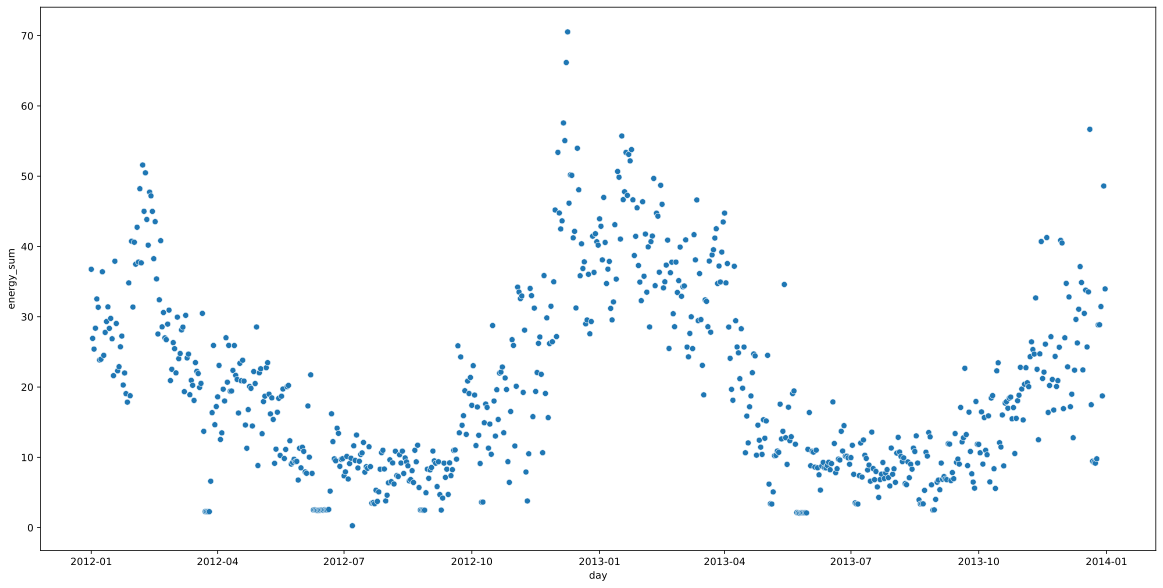

In [68]:
#Taking 1 home as an example, it is apparent it follows an expected pattern of high usage in cold months
plt.figure(figsize=(20,10)) 
x = energy_complete[energy_complete['LCLid']=='MAC000024']
sns.scatterplot(x=x['day'], y=x['energy_sum'], data=x)

# Merge All the Datasets together

In [28]:
#energy_complete and weather_complete
def energy_weather_merge(en_df, we_df):
    final = en_df.merge(we_df, left_on='day', right_on='Date', how='left')
    final = final.drop(['energy_median', 'energy_std','energy_min', 'index', 'time', 'Date','sunsetTime', 'sunriseTime'], axis=1)
    final.rename(columns={'day':'Date','energy_mean': 'mean_energy(KwH)', 'energy_max': 'max_energy(KwH)', 
                    'energy_sum': 'daily_energy(KwH)','file': 'Block', 
                    'Temp_Avg': 'Temperature(F)', 'Dewpoint': 'Dewpoint(F)', 
                    'Humidity': 'Humidity(%)', 'Wind_Speed':'Wind_Speed(mph)',
                    'Pressure': 'Pressure(Hg)'}, inplace = True)
    return final

In [29]:
out = energy_weather_merge(energy_complete, weather_complete)

In [30]:
out.head()

,LCLid,Date,mean_energy(KwH),max_energy(KwH),energy_count,daily_energy(KwH),stdorToU,Acorn,Acorn_grouped,Block,Exp_Value_People,Exp_Value_Beds,Temperature(F),Dewpoint_avg,Humidity(%),Wind_Speed(mph),Pressure(Hg),Rain,Daylight(Min)
0,MAC000015,2012-01-01,0.131812,0.171,48,6.327,ToU,ACORN-E,Affluent,block_19,3.09033,3.09115,52.8,48.8,87.1,10.2,29.6,0.0,474.0
1,MAC000016,2012-01-01,0.121104,0.239,48,5.813,Std,ACORN-K,Adversity,block_75,3.3913,3.48546,52.8,48.8,87.1,10.2,29.6,0.0,474.0
2,MAC000017,2012-01-01,0.117396,0.398,48,5.635,ToU,ACORN-C,Affluent,block_5,2.70054,3.75958,52.8,48.8,87.1,10.2,29.6,0.0,474.0
3,MAC000018,2012-01-01,0.164063,0.384,48,7.875,Std,ACORN-E,Affluent,block_31,3.09033,3.09115,52.8,48.8,87.1,10.2,29.6,0.0,474.0
4,MAC000019,2012-01-01,0.137375,0.906,48,6.594,Std,ACORN-K,Adversity,block_76,3.3913,3.48546,52.8,48.8,87.1,10.2,29.6,0.0,474.0


### Add a Column which shows the Day of Week and Weekend

In [51]:
def daytype(day):
    if day == 'Sat' or day == 'Sun':
        return 'Weekend'
    else:
        return 'Weekday'

def Add_Weekday(data_frame):
    dmap = {0:'Mon', 1: 'Tue', 2: 'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
    #Add column which shows the Weekday in integer
    data_frame['Day_Number'] = data_frame['Date'].apply(lambda x: x.weekday())
    #Add column which shows the Weekday in words
    data_frame['Weekday'] = data_frame['Day_Number'].map(dmap)
    data_frame['Day_Type'] = data_frame['Weekday'].apply(daytype)
    data_frame.drop(['Day_Number'], axis=1, inplace=True)
    return data_frame


In [33]:
final_setup = Add_Weekday(out)

In [52]:
final_setup.sample(5)

,LCLid,Date,mean_energy(KwH),max_energy(KwH),energy_count,daily_energy(KwH),stdorToU,Acorn,Acorn_grouped,Block,Exp_Value_People,Exp_Value_Beds,Temperature(F),Dewpoint_avg,Humidity(%),Wind_Speed(mph),Pressure(Hg),Rain,Daylight(Min),Weekday,Day_Type
697068,MAC002747,2012-09-17,0.062208,0.088,48,2.986,Std,ACORN-Q,Adversity,block_100,2.5709,1.85592,61.8,49.5,65.5,11.2,29.9,0.0,747.0,Mon,Weekday
320910,MAC002253,2012-06-29,0.233021,1.045,48,11.185,Std,ACORN-F,Comfortable,block_51,2.7973,3.63772,63.3,53.7,71.2,14.3,29.7,0.0,994.0,Fri,Weekday
2919497,MAC002084,2013-11-05,0.286813,0.797,48,13.767,ToU,ACORN-F,Comfortable,block_52,2.7973,3.63772,49.9,42.2,76.2,12.5,29.3,0.0,565.0,Tue,Weekday
864876,MAC002853,2012-10-20,0.260562,0.947,48,12.507,Std,ACORN-E,Affluent,block_28,3.09033,3.09115,57.0,54.0,88.0,20.0,29.7,0.0,619.0,Sat,Weekend
2690410,MAC001931,2013-09-22,0.163042,0.843,48,7.826,Std,ACORN-Q,Adversity,block_104,2.5709,1.85592,63.7,59.0,85.2,6.1,30.3,0.0,729.0,Sun,Weekend


# Final Cleaning before pickling
1. Remove homes with less than 680 readings over the 2 year timeframe
1. Remove rows where the energy_count is under 48. The data was taken at 30 minute intervals and therefore, any rows that have under 48 readings are missing some 30 minute readings.  There are about 4000 out of 570,000 rows with this scenario. I will just delete these rows
1. Remove rows with the Acorn Groups that do not fall under Affluent, Comfortable, or Adversity
1. Remove the useless columns

### 1.
There were several households with only a few readings.  I want to clean the Dataframe by only looking at the top 800 homes with readings.  These 800 homes have at least 680 readings over a 2 year timeframe. 

In [35]:
l_dict = list(dict(final_setup['LCLid'].value_counts().head(800)).keys())

In [36]:
df_low_count = final_setup[final_setup['LCLid'].isin(l_dict)]

### 2. 
Remove rows where energy_count is < 48. The data was taken every 30 minutes and thus the Daily Energy is calculated by summing up all 48 datapoints.  If there are any rows with missing data, it would throw off the model

In [37]:
df_low_count['energy_count'].value_counts()

48    565610
47      3114
1        497
46       159
45        73
26        61
42        47
27        43
29        43
25        40
44        38
28        38
21        37
24        37
22        34
43        32
30        24
19        23
39        18
41        17
40        17
23        16
18        16
20        16
38        12
36         7
34         6
16         6
37         5
33         4
17         4
35         2
32         2
31         2
15         1
14         1
Name: energy_count, dtype: int64

In [53]:
df_en_count = df_low_count[df_low_count['energy_count'] == 48]

### 3. 
Remove Acorn Groups that don't fall under the standard categories

In [54]:
df_en_count['Acorn_grouped'].value_counts()

Affluent       296966
Adversity      138820
Comfortable    124796
ACORN-U          5028
Name: Acorn_grouped, dtype: int64

In [55]:
final_dataset = df_en_count[df_en_count['Acorn_grouped'] != 'ACORN-U']

In [56]:
final_dataset['Acorn_grouped'].value_counts()

Affluent       296966
Adversity      138820
Comfortable    124796
Name: Acorn_grouped, dtype: int64

In [57]:
final_dataset.head()

,LCLid,Date,mean_energy(KwH),max_energy(KwH),energy_count,daily_energy(KwH),stdorToU,Acorn,Acorn_grouped,Block,Exp_Value_People,Exp_Value_Beds,Temperature(F),Dewpoint_avg,Humidity(%),Wind_Speed(mph),Pressure(Hg),Rain,Daylight(Min),Weekday,Day_Type
0,MAC000015,2012-01-01,0.131812,0.171,48,6.327,ToU,ACORN-E,Affluent,block_19,3.09033,3.09115,52.8,48.8,87.1,10.2,29.6,0.0,474.0,Sun,Weekend
2,MAC000017,2012-01-01,0.117396,0.398,48,5.635,ToU,ACORN-C,Affluent,block_5,2.70054,3.75958,52.8,48.8,87.1,10.2,29.6,0.0,474.0,Sun,Weekend
3,MAC000018,2012-01-01,0.164063,0.384,48,7.875,Std,ACORN-E,Affluent,block_31,3.09033,3.09115,52.8,48.8,87.1,10.2,29.6,0.0,474.0,Sun,Weekend
4,MAC000019,2012-01-01,0.137375,0.906,48,6.594,Std,ACORN-K,Adversity,block_76,3.3913,3.48546,52.8,48.8,87.1,10.2,29.6,0.0,474.0,Sun,Weekend
5,MAC000020,2012-01-01,0.311437,1.132,48,14.949,Std,ACORN-J,Comfortable,block_72,2.91402,3.10829,52.8,48.8,87.1,10.2,29.6,0.0,474.0,Sun,Weekend


### 4.
* Remove the unecessary columns

In [44]:
final_dataset_small = final_dataset.drop(['max_energy(KwH)', 'energy_count',
                                          'Rain', 'mean_energy(KwH)', 'stdorToU', 'Block'], axis=1)

In [45]:
final_dataset_small.head()

,LCLid,Date,daily_energy(KwH),Acorn,Acorn_grouped,Exp_Value_People,Exp_Value_Beds,Temperature(F),Dewpoint_avg,Humidity(%),Wind_Speed(mph),Pressure(Hg),Daylight(Min),Weekday,Day_Type
0,MAC000015,2012-01-01,6.327,ACORN-E,Affluent,3.09033,3.09115,52.8,48.8,87.1,10.2,29.6,474.0,Sun,Weekend
2,MAC000017,2012-01-01,5.635,ACORN-C,Affluent,2.70054,3.75958,52.8,48.8,87.1,10.2,29.6,474.0,Sun,Weekend
3,MAC000018,2012-01-01,7.875,ACORN-E,Affluent,3.09033,3.09115,52.8,48.8,87.1,10.2,29.6,474.0,Sun,Weekend
4,MAC000019,2012-01-01,6.594,ACORN-K,Adversity,3.3913,3.48546,52.8,48.8,87.1,10.2,29.6,474.0,Sun,Weekend
5,MAC000020,2012-01-01,14.949,ACORN-J,Comfortable,2.91402,3.10829,52.8,48.8,87.1,10.2,29.6,474.0,Sun,Weekend


In [48]:
final_dataset_small.to_pickle('Data/Final_Dataset.pkl')